In [16]:
# This code implements downsampling with python on nifti images
# To check whether we get/achieve the same results, we implemented the same with C3D and compared the results on our own. 
# The results are the identical. 
# Test codes for C3D are in the draft scripts in the folder "draft_scripts"

In [17]:
# A thing to remember if you are using python to do downsampling:
# downsampling breaks down the complete allignment of the nifti image. 
# So a new header is generated and a new resolution is generated. 
# if you notice the results before and after in FSLeyes, you will see that the image is not alligned anymore, and their dimensions are different. Including the voxel size.


In [18]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
# directories

maindir = "/Users/rashid_abid/Desktop/CS512_Computer_Vision/Project_proposal/final_project_draft2" # change this to your main directory
data_dir = os.path.join(maindir, "data_dir")

In [20]:
# read nifti file name and load data
subject_id = "sub003"
nifti_file = os.path.join(data_dir, subject_id, "QSM_masked_dim256.nii.gz") # QSM original file 
nifti_file = nib.load(nifti_file) # use nibabel to load nifti file
data = nifti_file.get_fdata()

In [21]:
# read header information 
header = nifti_file.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 128.5
qoffset_y       : -140.0
qoffset_z       : -120.0
srow_x          : [ -1.    0.  

Text(0.5, 1.0, 'Coronal Slice')

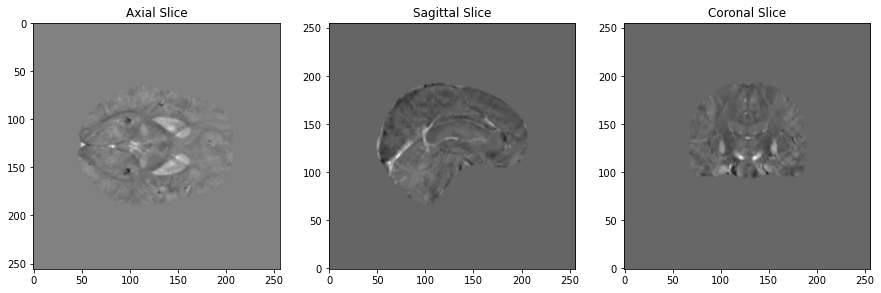

In [22]:
# show a slice of the data

# Choose the slices to show in each view 
# for easement we are selecting the middle slice
axial_slice = data.shape[2] // 2
sagittal_slice = data.shape[0] // 2
coronal_slice = data.shape[1] // 2

# Subplotting the slices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Show the axial slice
axs[0].imshow(data[:, :, axial_slice], cmap='gray')
axs[0].set_title('Axial Slice')

# Show the sagittal slice
axs[1].imshow(data[sagittal_slice, :, :].T, cmap='gray', origin='lower')
axs[1].set_title('Sagittal Slice')

# Show the coronal slice
axs[2].imshow(data[:, coronal_slice, :].T, cmap='gray', origin='lower')
axs[2].set_title('Coronal Slice')

In [23]:
# We downsample the images by the factor of 2 only. This way we can compare them in the models. 

# Downsample the data by a factor of 2
downsampled_data = data[::2, ::2, ::2]

# Save the downsampled data to a new NIfTI file
downsampled_nifti = nib.Nifti1Image(downsampled_data, nifti_file.affine, nifti_file.header)
# print the original size and the size of the downsampled data
print("Original size:", data.shape)
print("Downsampled size:", downsampled_data.shape)

Original size: (256, 256, 256)
Downsampled size: (128, 128, 128)


In [24]:
# check the header information again
# If you load them into FSL, you will notice that the dimensions have changed and the voxel size has doubled. 

print(downsampled_nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 128 128 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 128.5
qoffset_y       : -140.0
qoffset_z       : -120.0
srow_x          : [ -1.    0.  

Text(0.5, 1.0, 'Coronal Slice')

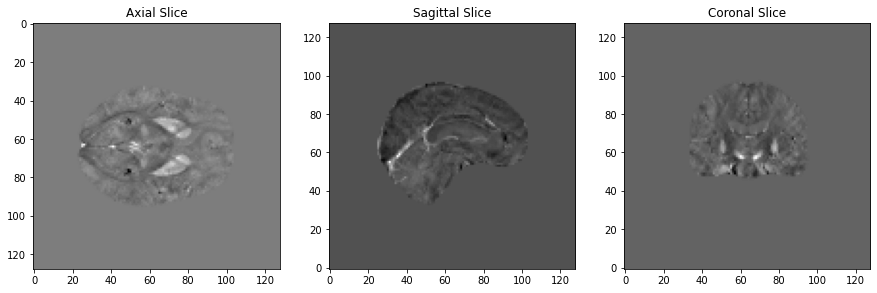

In [25]:
# View the results again, and notice the change in image sharpness
# For better viewing, use FSL

# Choose the slices to show in each view 
# for easement we are selecting the middle slice
axial_slice = downsampled_data.shape[2] // 2
sagittal_slice = downsampled_data.shape[0] // 2
coronal_slice = downsampled_data.shape[1] // 2

# Subplotting the slices
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Show the axial slice
axs[0].imshow(downsampled_data[:, :, axial_slice], cmap='gray')
axs[0].set_title('Axial Slice')

# Show the sagittal slice
axs[1].imshow(downsampled_data[sagittal_slice, :, :].T, cmap='gray', origin='lower')
axs[1].set_title('Sagittal Slice')

# Show the coronal slice
axs[2].imshow(downsampled_data[:, coronal_slice, :].T, cmap='gray', origin='lower')
axs[2].set_title('Coronal Slice')

In [26]:
# save the files and test them in FSLeyes
new_nifti_file = os.path.join(data_dir, subject_id, "QSM_masked_downsampled_tested_at_dim128.nii.gz") # QSM downsampled file
nib.save(downsampled_nifti, new_nifti_file)